<a href="https://colab.research.google.com/github/jindaldisha/Deep-Learning-and-Neural-Networks/blob/main/Neural-Networks-with-Tensorflow/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with Tensorflow

Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (outcome variable/ labels) and one or more independent variables (features/ input variable).

In a  regression problem, to put is simply, we predict numbers.

 


We're going to see how to take inputs (data), build a neural network to find patterns in those inputs and make predictions (in the form of numbers) based on those inputs.

Things to do:

* Build an architecture of a neural network model
* Input shapes (features) and output shapes (labels) of a regression model
  - `x`: features/data (inputs)
  - `y`: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling:
 * Creating a Model
 * Compiling a Model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
 * Fitting a Model (getting it to find patterns in our data)
 *  Visualizng the model
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model



 

Say we have to predict the price of house and we're given the values of number of bedrooms, number of bathrooms etc. We have to numerically enocode these values. And these are the input variables i.e. the input features. These features go into our machine learning algorithm, and our algorithm will make a prediction of the price (the label that we're trying to calculate) based on the input features. This predicted output comes out of learning off of various actual outputs. This is an example of Supervised Learning. We might have hundreds of/or thousands of different homes with all of their input features and their actual sale price. And then we might feed these inputs and outputs to our machine learning algorithm and its going to learn the relationships between the features and labels.  
   

Steps: 
 - Get data ready (turn into tensors)
 - Build or pick a pretrained model (to suit your problem)
 - Fit the model to the data and make a prediction
 - Evaluate the model
 - Improve through experimentation
 - Save and reload your trained model

 ## Anatomy of Neural Networks 

 Every neural network has:
 - Input Layer (data goes in here)
 - Hidden Layer(s) (learns pattern in data) 
 - Output Layer (outputs learned representation or prediction probabilites



The more the number of hidden layers, the deeper the neural network is.


## Architecture of Neural Networks

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually ReLU (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | MSE (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | SGD (stochastic gradient descent), Adam |


 A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

 The value of parameters depend on the value of hyperparameters.

 Loss function measures how wrong our neural network is i.e. how wrong the relations between the input and the output is, and then we optimize it (try to decrease the loss function) by using optimizers (SGD, Adam, etc.).
 It tells us how we can improve our model to reduce the loss function.

 And then we fit our model to the data.

In [197]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.5.0


##Creating data to View and Fit

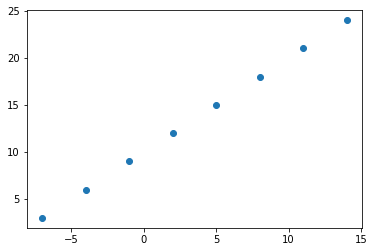

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize
plt.scatter(x,y)

##Input and Output shapes


In [199]:
#Turning numpy arrays into tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in modelling with tensorflow

1. **Creating a model** -  
  - Define the input and output layers
  - as well as the hidden layers of our neurl network

2. **Compiling a model** - 
  - Define the loss function (it tells our model how wrong it is)
  - and the optimizers (tells our model how to improve the pattern its learning by decreasing the loss function)
  - and the evaluation metrices (we use to interpret the performance of our model)

3. **Fitting the model** - 
  - Letting the model try to find patterns between x and y (features and labels)


In [200]:
# Set random seed (yeah i recognized the 42 reference in a hearbeat *nerd alert*)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
#It basically means I want to make a model and i want you to sequentially go through the following
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) #Layer and the number of neurons it has                           
])

# 2. Compiling a Model
model.compile(loss = tf.keras.losses.mae, #Calculating loss using mean absolute error
                                          #It is the mean of the absolute of the difference between predicted and actual value
              optimizer = tf.keras.optimizers.SGD(), # Calculate how to optimze our predictions
                                                    # Stochastic Gradient Descent
              metrics = ["mae"] #evaluation metrices
              )

#3 
history = model.fit(x,y, epochs=5) #epochs is the number of iterations/laps

Epoch 1/5
1/1 [==============================] - 0s 247ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [201]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [202]:
#Try and make a prediction using our model
model.predict([17.0]) #About 15 off 

array([[12.716021]], dtype=float32)

Text(0.5, 0, 'Epochs')

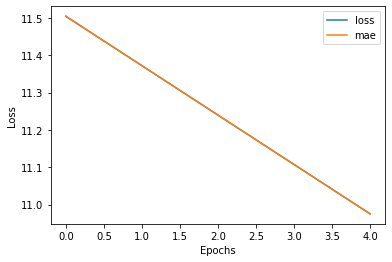

In [203]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Improving our Model
 
 We can improve our model by tweaking and altering the steps we took to create the model.

 **Creating the model** - 
  - Add more layer
  - Increase the number of hidden neurons withim each of the hidden layers
  - Change the activation functions of each layer

**Compiling the model** - 
  - Change the optimization function
  - Change the learning rate of the said optimization function

**Fitting the model** - 
 - Let it learn for longer (increase the value of the epochs
 - Give the model more examples to learn from


##Building a bigger model

As compared to the previous model, we'll add more hidden layers and the number of neurons each hidden layer has. We'll also pass an activation function for each layer.

We'll change the optimizer and also give it a learning rate (alpha).

Smaller the value of alpha, the smaller the steps the optimizer takes. It might make the optimizer slow but it will give a more accurate result.

If the learning rate is too large, our optimizer may never converge and even pass over the optimal value. 

The learning rate is the most important hyperparameter you can change to improve your model

We'll increase the value of epochs and also increase the size of our dataset.


In [204]:
#Let's rebuild our model
#Changes from the previous one - (Increase the number of epochs - Train for longer)
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fitting the model
history = model.fit(x,y,epochs = 100, verbose=0)

Text(0.5, 0, 'Epochs')

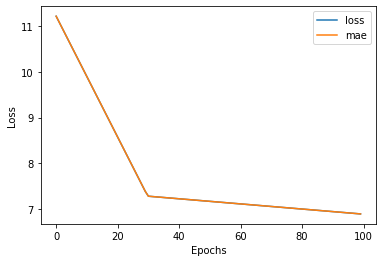

In [205]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [206]:
 x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [207]:
model.predict([17.0]) #Much closer than before, about 3 off

array([[29.739855]], dtype=float32)

In [208]:
#Changes from the previous one - (adding a hidden layer)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = (["mae"])
)

# 3. Fit the model
history = model.fit(x, y, epochs = 100, verbose=0)

Text(0.5, 0, 'Epochs')

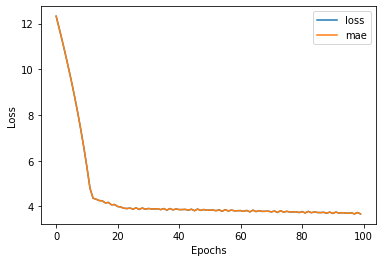

In [209]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [210]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [211]:
model.predict([17.0]) #Off by about 5, the previous one was better, our model has overfitted

array([[31.223137]], dtype=float32)

In [212]:
#Changes from the previous one - (change the activation function and the optimizer)
 
# 1. Create a Model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(
    loss = "mae",
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = (["mae"])
)

# 3. Fitting the Model
history = model.fit(x, y, epochs=100, verbose=0)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Text(0.5, 0, 'Epochs')

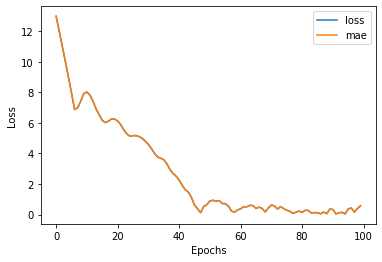

In [213]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [214]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [215]:
model.predict([17.0]) #The best model so far

array([[28.114773]], dtype=float32)

##Evaluating a Model

In practice, a typical workflow you'll go through when building a neural network is:

Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it .. and the cycle goes on. 

When evaluating a model, its a good idea to visualize:
 
- The data (what data are we working with, what does it look like)
- The model itself (what does our model look like)
- The training of a model (how does a model perform while it learns)
- The predictions (how do the predictions of a model line up against the original labels)

In [216]:
#Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [217]:
#Make labels for the dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

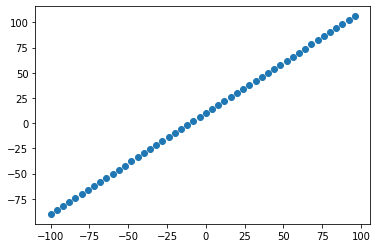

In [218]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x, y)

###The 3 sets
- **Training Set** - The model learns from this data - typically 70 - 80 % of the total available data
- **Validation Set** - The model is tweaked on this data - typically 10 - 15 % of the available data
- **Testing Set** - The model is tested on this data - typically 10 - 15 % of available data


If you want only two sets, you usually drop the validation set and do a 80 - 20 split between train and test. 

We want our model to be in an ideal state of **Generalization**. It is the ability of a model to perform well on data it hasn't seen before.  

In [219]:
#Length of sample data
len(x)

50

In [220]:
#Splitting into train and test
x_train = x[:40] #First 40 are training examples (80%)
y_train = y[:40]
x_test = x[40:] #Last 10 are testing examples (20%)
y_test = y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

###Visualize the Data

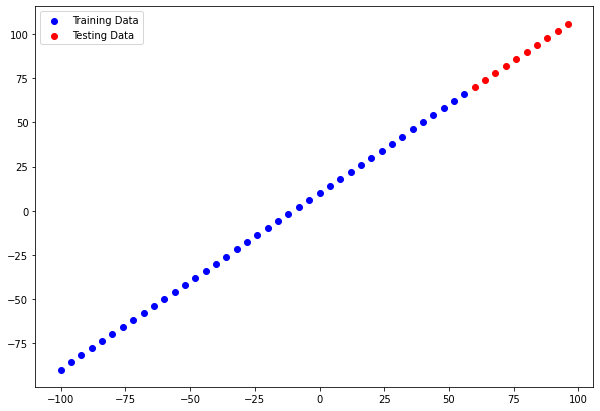

In [221]:
plt.figure(figsize=(10,7))
#Training data in blue
plt.scatter(x_train, y_train, c="b", label = "Training Data")
#Testing data in red
plt.scatter(x_test, y_test, c="r", label="Testing Data")
#Show legend
plt.legend();

In [222]:
#Build Neural Network for our data
# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                             
])
# 2. Compile the Model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the Model
# model.fit(x_train, y_train, epochs=100)

In [223]:
#Create a model that builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")                             
], name = "model_1")

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)




In [224]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- **Total params** - Total number of parameters in the model
- **Trainable params** - The parameters (patterns) that the model can update
- **Non-trainable param** - The parameters aren't updated during training. When say in future, we import a model that has already learned patterns in data, what we might do is freeze those learned patterns, so in that case we might have a whole bunch of non-trainable paramters to keep its existing pattern. This happens in Transfer learning.

In [225]:
 #3. Fit the model
history = model.fit(x_train, y_train, epochs=100, verbose=0) #verbose = 0 doesn't show any output

Text(0.5, 0, 'Epochs')

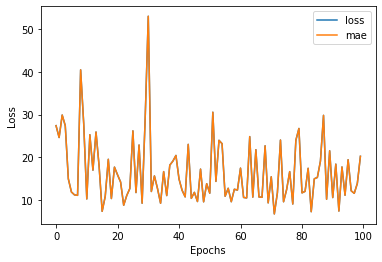

In [226]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [227]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


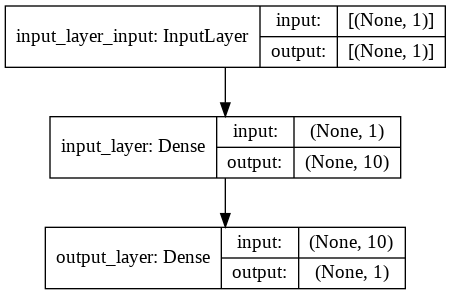

In [228]:
from tensorflow.keras.utils import plot_model
#Converts a Keras model to dot format and save to a file.
plot_model(model = model, show_shapes=True)

###Visualize Model's Preductions

To visualize predictions, it's a good idea to plot them against the actual labels.

Often it is seen in the form of y_test/y_true vs y_pred.

In an ideal world, y_test == y_pred

In [229]:
#Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [230]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [231]:
#Plotting Function

def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plot training data, test data and compares predictions to the actual labels.
  """
  plt.figure(figsize=(9,7))
  #Training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  #Testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")
  #Predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show Legends
  plt.legend();

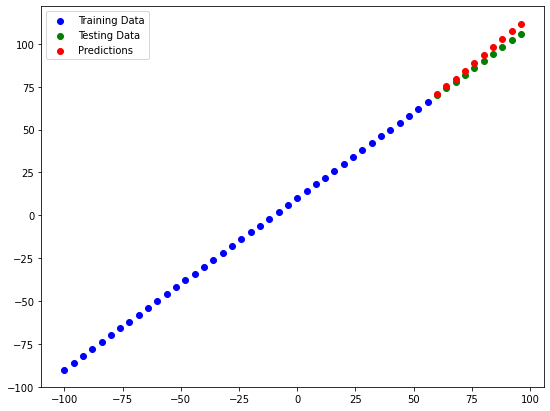

In [232]:
plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_pred)

###Evaluating our model's predictions with regression evaluation metrics


The different evaluation metrics we use to evaluate our model's performance depend on the problem that we're working on.

For regression, two of the main metrics are:
- **MAE** - Mean Absolute Error - On average how wrong is each of the model's predictions. It is the average of the absolute of the difference between the actual value and the predicted value. It is agreat starter metric for any regression problem
    - `tf.keras.losses.MAE()`
    - `tf.metrics.mean_absolute_error()`
- **MSE** - Mean Square Error - Square the average errors. It is the average of the square of the difference between the actual value and the predicted value. It is used when larger errors are more significant than smaller errors.
    - `tf.keras.losses.MSE()`
    - `tf.metrics.mean_squared_error()`
- **Huber** - It is a combination of MSE and MAE. It is a less sensitive outliers than MSE.
    - `tf.keras.losses.Huber()`

- You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [233]:
#Evaluate the model on the test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 87ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [234]:
#Making sure the shapes are same
y_pred = tf.constant(y_pred,shape=(10,)) #We can also create the tensor then use tf.squeeze() to remove  the 1s in its shape
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
         93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
       dtype=float32)>)

In [235]:
#Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, y_pred)
# tf.keras.losses.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [236]:
(tf.reduce_sum(abs(tf.cast(y_test, dtype=tf.float32) - y_pred)))/10

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [237]:
#Mean Square Error
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [238]:
# (tf.reduce_sum((y_pred - y_test)**2))/10
(tf.reduce_sum((tf.cast(y_test, dtype=tf.float32) - y_pred)**2))/10

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [239]:
#Functions for mae and mse

def mae(y_test, y_pred):
  y_pred = tf.constant(y_pred)
  y_pred = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  y_pred = tf.constant(y_pred)
  y_pred = tf.squeeze(y_pred)
  return tf.metrics.mean_squared_error(y_test, y_pred)

## Running Experiments to Improve our Model

Ways to improve your model:

1. Get more data - get more examples for your model to train on. It gives our model more opportunities to learn patterns and relationships between the features and labels.
2. Make your model larger (use a more complex model) - add more layers or more hidden units in each layer.
3. Train for longer - increase the value of epochs - give the model more chance to find patterns in the data.


Modeling Experiments to do:
- model_1 -> layers = 1, epochs = 100
- model_2 -> layers = 2, epochs = 100
- model_3 -> layers = 2, epochs = 500

In [240]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [241]:
#model_1

tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the model

history = model_1.fit(x_train, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'Epochs')

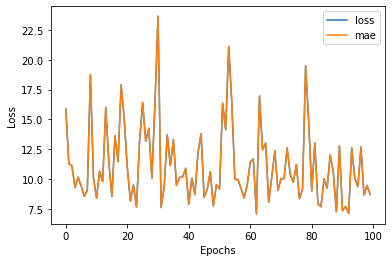

In [242]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

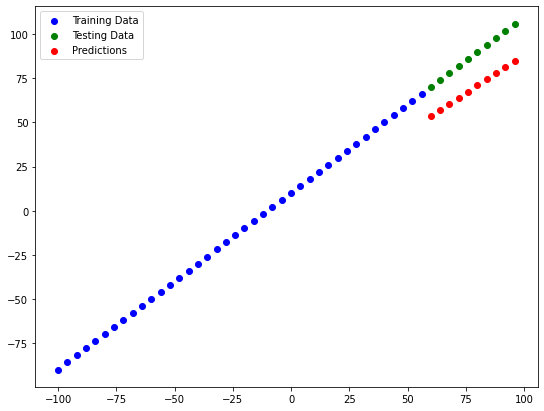

In [243]:
#Make and plot predictions for model_1
y_pred_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [244]:
#Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [245]:
#model_2
tf.random.set_seed(42)
# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")                               
])

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Fit the model
history = model_2.fit(x_train, y_train, epochs=100, verbose=0)

Text(0.5, 0, 'Epochs')

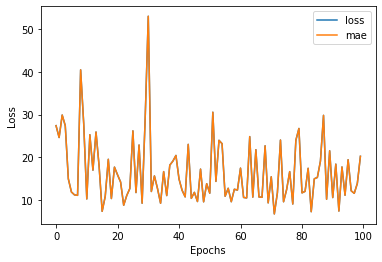

In [246]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

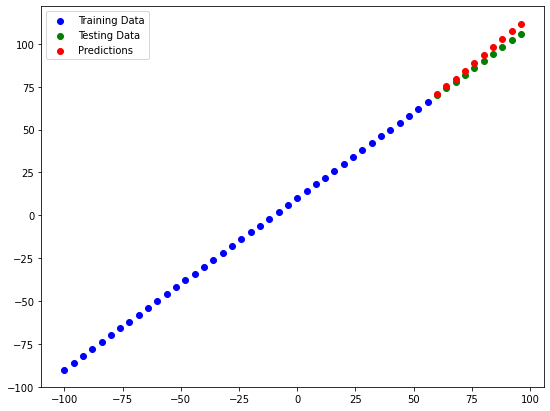

In [247]:
#Make and plot predictions for model_2
y_pred_2 = model_2.predict(x_test)
plot_predictions(predictions = y_pred_2)

In [248]:
#Evaluation metrics for model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [249]:
#model_3

tf.random.set_seed(42)
# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the model
history = model_3.fit(x_train, y_train, epochs=500, verbose=0)

Text(0.5, 0, 'Epochs')

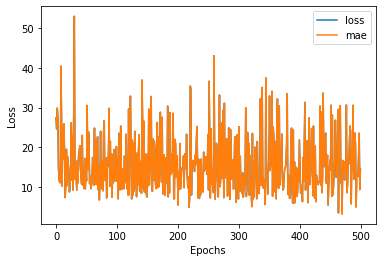

In [250]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

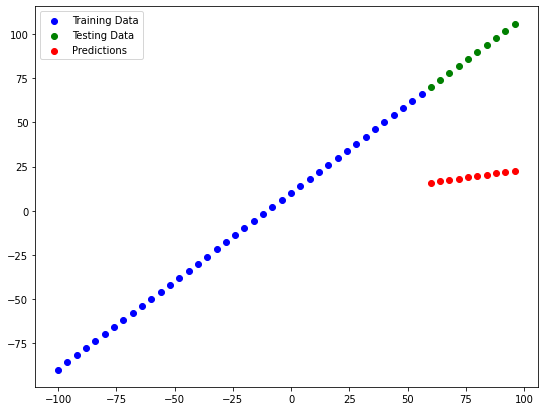

In [251]:
#Make and Plot predictions for model_3
y_pred_3 = model_3.predict(x_test)
plot_predictions(predictions = y_pred_3)

In [252]:
#Evaluation metrics for model_3
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3   

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

model_3 is an example of  overfitting - the model has learned the training data too well and isnt generalizing.


Also when experimenting, start with small model and make sure they work and then move on to bigger more complex models.

##Comparing results of different experiment models

In [253]:
#Compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [254]:
#Model 2 perform the best
model_2.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


One of you main goals is to minimize time between each experiment. The more experiments you do, the more you'll figure what doesn't work, and in turn get closer to figuring out what does work.

##Tracking your experiments

One really good habit is keeping track of your experiments.

This can be done using:

- TensorBoard - a component of the TensorFlow library to help track modelling experiments.
- Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

##Saving our Models


Saving a model allows us to use it outside of google colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model in:
- SavedModel Format 
    - tf (default)
    - saves as a folder
    - to load - tf.keras.models.load_model()
- HDF5 Format (Hierarchical Data Format)
    - .h5 extension
    - saves as a single .h5 file
    - to load - tf.keras.modes.load_model()


In [255]:
#Save model using SavedModel Format
model_2.save("model_2_tf")

INFO:tensorflow:Assets written to: model_2_tf/assets


In [256]:
#Save model using HDF5 
model_2.save("model_2_h5.h5")

In [257]:
##Checking the directory to make sure the model has been saved
import os
os.listdir('.')

['.config', 'model_2_h5.h5', 'model.png', 'model_2_tf', 'sample_data']

##Loading in saved models


In [258]:
# Load in the SavedModel model
model_tf = tf.keras.models.load_model('model_2_tf')
model_tf.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [259]:
#Compare model_2 predictions with model_tf (SavedModel)

model_2_pred = model_2.predict(x_test)
model_tf_pred = model_tf.predict(x_test)
mae(y_test, model_2_pred) == mae(y_test, model_tf_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [260]:
model_2_pred == model_tf_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [261]:
#Load in the HDF5 Model
model_h5 = tf.keras.models.load_model("model_2_h5.h5")
model_h5.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [262]:
#Compare model_2 predictions with model_h5 (HDF5)

model_2_pred = model_2.predict(x_test)
model_h5_pred = model_h5.predict(x_test)
mae(y_test, model_2_pred) == mae(y_test, model_h5_pred)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [263]:
model_2_pred == model_h5_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

From above, we can see that the models were saved and loaded correctly.

Note: To download a file from google colab

`from google.colab import files`

`files.download(file_path)`

##Neural Network Regression For Insurance Forecast


Columns:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

To find what someone's medical costs build by health insurance will be.

We're using the features to predict a number (the cost of the insurance), therefore it is a regression problem.


 - The dependent variable (label) - charges
 - The independent variable (features) - age, sex, bmi, children, smoker, region


Steps:

- Get data ready (turn into tensors)
- Build or pick a pretrained model (to suit your problem)
- Fit the model to the data and make a prediction
- Evaluate the model
- Improve through experimentation
- Save and reload your trained model

In [264]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [265]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [266]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 Since some of the features are non-numerical, we have to first turn them into numbers.

In [267]:
#One-hot encode our DataFrame (Numerical Encoding)

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [268]:
#Create x and y (features and labels)
x = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [269]:
#View x (features)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [270]:
#View y (labels)
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [271]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [272]:
#Checking length
len(x), len(x_train), len(x_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [273]:
#Build a Neural Network
#Set seed
tf.random.set_seed(42)

# 1. Create a Model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")                                       
])
# 2. Compile the Model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the Model
insurance_model.fit(x_train, y_train, epochs=100, verbose=0)

In [274]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Experimenting to improve our model's performance.
To try to improve our model, we'll run the following experiments:
 - Add an extra layer and increase the number of hidden units and changing the optimizer.
 - Increase the value of epochs (train for longer).

In [275]:
#Change from the previous model - increase the number of layers and hidden units
#Set seed
tf.random.set_seed(42)

# 1. Create a Model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                       
])
# 2. Compile the Model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)
# 3. Fit the Model
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [276]:
#Check the results of the insurance model on the test data
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [277]:
#Change from the previous model - train for longer
#Set seed
tf.random.set_seed(42)

# 1. Create a Model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                       
])
# 2. Compile the Model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)
# 3. Fit the Model
history = insurance_model_3.fit(x_train, y_train, epochs=200, verbose=0)

In [278]:
#Check the results of the insurance model on the test data
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7854


[3488.785400390625, 3488.785400390625]

Text(0.5, 0, 'Epochs')

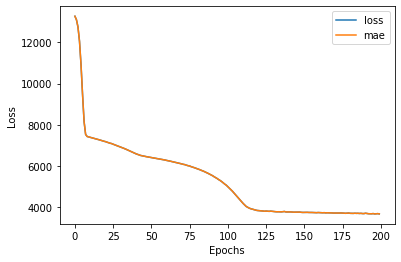

In [279]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

How long should you train your model for?

It depends on the problem that we're working on.
However, there is a tensorflow component called `EarlyStopping Callback`,
which you can add to your model to stop training once it stops improving.

##Preprocessing Data (Normalization and Standardization)

There is one step that we can use to improve the preprocessing of our data.

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).


The first step of modelling with Tensorflow is Preprocessing. It includes:
- Turning all the data into numbers (neural networks cannot handle strings)
- Make sure all of your tensors are the right shape.
- Scale features (normalize or standardize, neural networks tend to prefer normalization)
    - The goal of normalization is to change the values of numeric columsn in the dataset to a common scale, without distorting differences in the range of values. Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    - Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.

| **Scaling Type** | **What it does** | **Scikit-Learn-Function** | **When to use** |
| --- | -- | -- | -- |
|Scale (also referred to as normalisation) | Converts all values to between 0 and 1 <br>whilst preserving the original distribution. | MinMaxScaler | Use as default scaler with neural networks. |
| Standardization | Removes the mean and divides by the standard deviation | StandardScaler | Transform a feature to have close to normal distribution <br>(caution: this reduces the effect of outliers). |


Many machine learning algorithms perform better or converge faster when the features are on a relatively similar scale and/or close to normally distributed.  


In [280]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [281]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #normalize values in these columns
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#Create x and y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

#Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(x_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [282]:
#Viewing the data
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [283]:
#Build the neural network model
#Set random seed
tf.random.set_seed(42)

# 1. Build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit the model
history = model.fit(x_train_normal, y_train, epochs=100, verbose = 0)

In [284]:
#Evaluate the model
model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

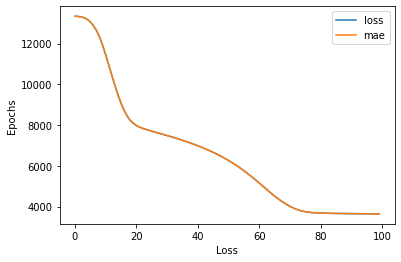

In [285]:
pd.DataFrame(history.history).plot()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

From the above model, we can see that normalizing the data helped in faster convergence.